<a href="https://colab.research.google.com/github/lanasyaa199/Latihan1/blob/main/Homework_Lana_Syakina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [ ]:
import pandas as pd
df = pd.read_csv('online_retail_II.csv')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## Section 1

### Create New Feature: Year

In [ ]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [ ]:
#mengubah tipe data InvoiceDate menjadi datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [ ]:
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Filtering Data

In [ ]:
df2 = df[(df['Quantity'] >= 1) & (df['Invoice'] != 'C')]
df2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Create New Feature: Revenue

In [ ]:
df2['Revenue'] = df2['Quantity'] * df2['Price']
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


### Average of Revenue per Year

In [ ]:
df_avg = df2.groupby('Year')['Revenue'].mean().reset_index()
df_avg

,Year,Revenue
0,2009,18.713273
1,2010,19.909680
2,2011,20.058767


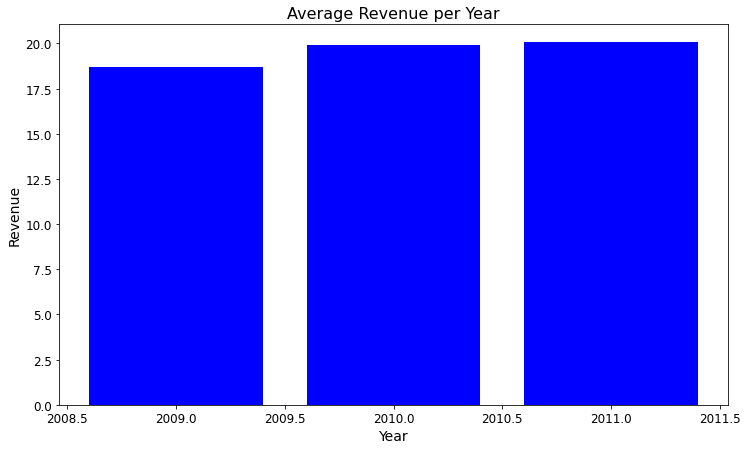

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Year = df_avg['Year']
Revenue = df_avg['Revenue']
plt.figure(figsize=(12,7))
plt.bar(Year, Revenue, color='blue')

plt.title('Average Revenue per Year', size=16)
plt.ylabel('Revenue', size=14)
plt.xlabel('Year', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

### Interpretation

The Average of Revenue has increased per year from 2009 to 2011.

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [ ]:
finished = df2[df2['Customer ID'].notna()]
finished.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
747540,556330,22704,WRAP RED APPLES,25,2011-06-10 11:29:00,0.42,17797.0,United Kingdom,2011,10.50
132066,501903,84804B,BLUE DELPHINIUM ARTIFICIAL FLOWER,12,2010-03-21 15:50:00,2.95,18078.0,United Kingdom,2010,35.40
314206,519931,21166,COOK WITH WINE METAL SIGN,3,2010-08-22 15:57:00,1.95,15547.0,United Kingdom,2010,5.85
202229,508861,22070,SMALL RED RETROSPOT MUG IN BOX,1,2010-05-18 15:37:00,3.75,15984.0,United Kingdom,2010,3.75
748607,556474,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,3,2011-06-12 12:01:00,2.95,16007.0,United Kingdom,2011,8.85


#### Customers who canceled their purchases

In [ ]:
cancel = df[df['Invoice'].str.contains('C')]
cancel

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011


### Number of Finished and Canceled Transactions Each Year

In [ ]:
finished_count = finished.groupby('Year')['Customer ID'].count().reset_index()
finished_count

,Year,Customer ID
0,2009,30761
1,2010,403094
2,2011,371765


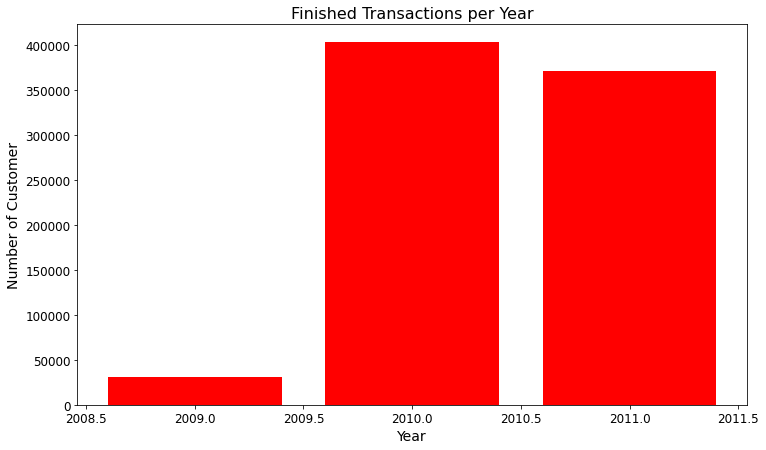

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Year = finished_count['Year']
Customer_ID = finished_count['Customer ID']
plt.figure(figsize=(12,7))
plt.bar(Year, Customer_ID, color='red')

plt.title('Finished Transactions per Year', size=16)
plt.ylabel('Number of Customer', size=14)
plt.xlabel('Year', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [ ]:
cancel_count = cancel.groupby('Year')['Customer ID'].count().reset_index()
cancel_count

,Year,Customer ID
0,2009,999
1,2010,9530
2,2011,8215


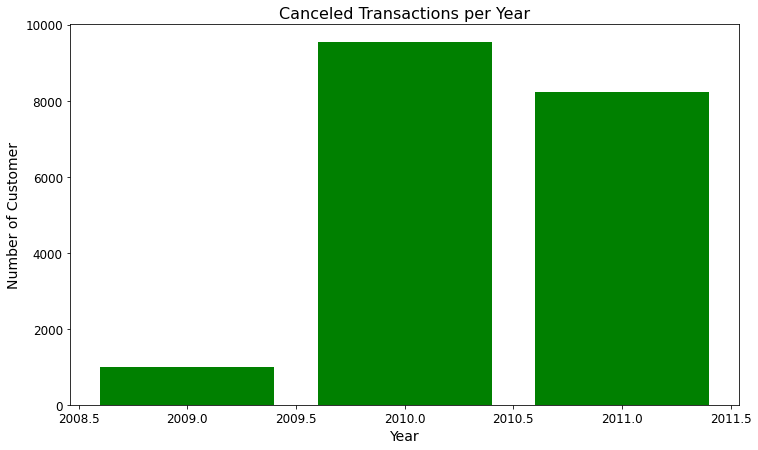

In [ ]:
%matplotlib inline

Year = cancel_count['Year']
Customer_ID = cancel_count['Customer ID']
plt.figure(figsize=(12,7))
plt.bar(Year, Customer_ID, color='green')

plt.title('Canceled Transactions per Year', size=16)
plt.ylabel('Number of Customer', size=14)
plt.xlabel('Year', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

### Cancellation Rate

In [ ]:
df_year = df.groupby('Year')['Customer ID'].count().reset_index()
df_year

,Year,Customer ID
0,2009,31760
1,2010,412624
2,2011,379980


In [ ]:
cancel_rate = cancel_count['Customer ID'] / df_year['Customer ID']
cancel_rate

0    0.031455
1    0.023096
2    0.021620
Name: Customer ID, dtype: float64

### Interpretation

The number of finished and canceled transactions per year is different and its significant. The cancellation rate for each year was influenced by canceled and total transactions per year. So the cancellation rate for 2009 is 3.14%, for 2010 is 2.30%, for 2011 is 2.16%.